In [1]:
import numpy as np
import emcee
print("This version of emcee is:", emcee.__version__)
import sys
print("This version of Python is %s.%s.%s" % sys.version_info[:3])
from matplotlib import pyplot as plt
import scipy.stats 
from IPython.display import display, HTML

This version of emcee is: 2.2.1
This version of Python is 3.6.2


---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# The MCMC Hammer

<b>The emcee module is a Python implemenation of the Affine-Invariant Markov chain Monte Carlo (MCMC) Ensemble sampler, originally developed by Goodman & Weare.</b> 

<div style="display: flex; justify-content: row;">
    <img src="https://media.giphy.com/media/xDrn9oG797R96/giphy.gif">
</div>

Side quest? __[MC Hammer: U Can't Touch This (Official Video)](https://www.youtube.com/watch?v=otCpCn0l4Wo)__

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


<div class="alert alert-block alert-info">

### 📓 | References  

</div>

- __[Link to arXiv paper](https://arxiv.org/pdf/1202.3665.pdf)__

- __[Link to official documentation](https://emcee.readthedocs.io/en/v2.2.1/user/quickstart/)__

- "A Zero-Math Introduction to Markov Chain Monte Carlo Methods", Ben Shaver
    - __[Link to Medium article](https://towardsdatascience.com/a-zero-math-introduction-to-markov-chain-monte-carlo-methods-dcba889e0c50)__ 

---

<div class="alert alert-block alert-info">

<b> 🔢  | Math sidenote </b>  

</div>


 <b>Affine space</b> 

"In mathematics, an affine space is a geometric structure that generalizes some of the properties of Euclidean spaces in such a way that these are independent of the concepts of distance and measure of angles, keeping only the properties related to parallelism and ratio of lengths for parallel line segments.

In an affine space, there is no distinguished point that serves as an origin. Hence, no vector has a fixed origin and no vector can be uniquely associated to a point. In an affine space, there are instead displacement vectors, also called translation vectors or simply translations, between two points of the space. Thus it makes sense to subtract two points of the space, giving a translation vector, but it does not make sense to add two points of the space. Likewise, it makes sense to add a displacement vector to a point of an affine space, resulting in a new point translated from the starting point by that vector.

Any vector space may be considered as an affine space, and this amounts to forgetting the special role played by the zero vector. In this case, the elements of the vector space may be viewed either as points of the affine space or as displacement vectors or translations. When considered as a point, the zero vector is called the origin. Adding a fixed vector to the elements of a linear subspace of a vector space produces an affine subspace. One commonly says that this affine subspace has been obtained by translating (away from the origin) the linear subspace by the translation vector. In finite dimensions, such an affine subspace is the solution set of an inhomogeneous linear system. The displacement vectors for that affine space are the solutions of the corresponding homogeneous linear system, which is a linear subspace. Linear subspaces, in contrast, always contain the origin of the vector space." (Thanks, wiki!) 
        
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 

## 1. Quickstart: Sampling a multi-dimensional Gaussian

This demonstration illustrates how to draw samples from a multivariate Gaussian of the form, 
\begin{equation*}
p(\vec{x}) \propto exp \left( -\frac{1}{2} (\vec{x} - \vec{\mu}) ^ T \Sigma^ {-1} (\vec{x} - \vec{\mu}) \right), 
\end{equation*} 

where $\vec{\mu}$ is an N-dimensional vector of the mean, and $\Sigma$ is an N-by-N covariance matrix.  

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


The function below will return the log of the density $p(\vec{x})$ given $\vec{x}$,$\vec{\mu}$, and $\Sigma^{-1}$:

In [2]:
np.random.seed(123)

def lnprob(x, mu, icov):
    '''Log of probability function p'''
    diff = x-mu
    return -np.dot(diff,np.dot(icov,diff))/2.0

Establishing values of hyperparameters in five dimensions: 

In [3]:
ndim = 5 #number of dimensions
np.random.seed(42)
means = np.random.rand(ndim)

#cov is covariant matrix 
cov = 0.5 - np.random.rand(ndim ** 2).reshape((ndim, ndim))
cov = np.triu(cov) #Return a copy of a matrix with the elements below the k-th diagonal zeroed.
cov += cov.T - np.diag(cov.diagonal())
cov = np.dot(cov,cov)

icov = np.linalg.inv(cov)

nwalkers = 32 
p0 = np.random.rand(ndim * nwalkers).reshape((nwalkers, ndim))

"EnsembleSampler" object is the main interface provided by emcee: 

In [4]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=[means, icov])
#sampler.reset()

By setting up the args argument above, we're allowing our probability function lnprob to be called as:

In [5]:
lnprob(p0[0], means, icov)

-2.5960945890854434

Running so-called "burn-in" steps in the MCMC chain lets the walkers we initiated explore parameter space and "get settled into the maximum of the density." Here, we're using a burn-in of 100 steps, starting from p0-- our initial guess:

In [6]:
pos, prob, state = sampler.run_mcmc(p0,100)
#state = sampler.run_mcmc(p0,100)
sampler.reset()

We can now do a production run, here using 10,000 steps:

In [7]:
sampler.run_mcmc(pos, 10000)

(array([[ 1.27383773e-01,  1.86663121e+00,  1.51641764e+00,
          8.19466796e-01,  4.59611603e-01],
        [ 1.31180172e-01,  1.06256417e+00,  9.24920189e-01,
          6.57569348e-02, -6.22993170e-01],
        [ 5.63338972e-01,  4.98534898e-01,  9.83948693e-01,
          8.07004752e-01,  4.73940231e-02],
        [ 2.75959152e-01, -7.19094561e-01,  4.02452470e-01,
          1.28902177e+00,  1.29708149e+00],
        [ 3.79950912e-01,  1.28705383e-01,  6.31907140e-01,
          6.58663855e-01,  4.99607021e-01],
        [-3.53568989e-02,  1.32096580e+00,  1.05139854e+00,
          3.10868128e-02, -1.07104960e-01],
        [ 6.48698240e-01,  7.40494397e-01,  6.84418290e-01,
          3.00321106e-01, -2.32182361e-01],
        [ 6.08629872e-01,  2.87964933e+00,  1.04392452e+00,
         -5.57623046e-04, -7.54731865e-01],
        [ 2.19925110e-01,  1.33891050e+00,  8.93352190e-01,
          8.65678821e-01,  3.58949587e-01],
        [ 1.05058459e+00,  1.00677014e+00,  3.22014577e-01,
    

Now we can create histograms of these density samples to get an estimate of the density:

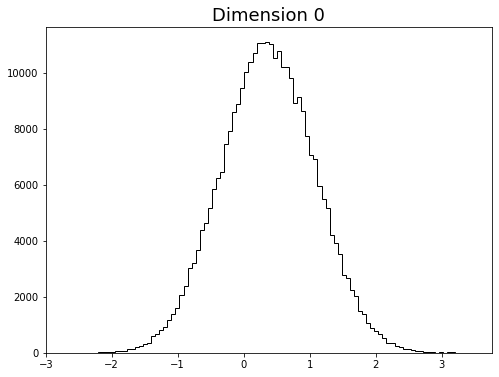

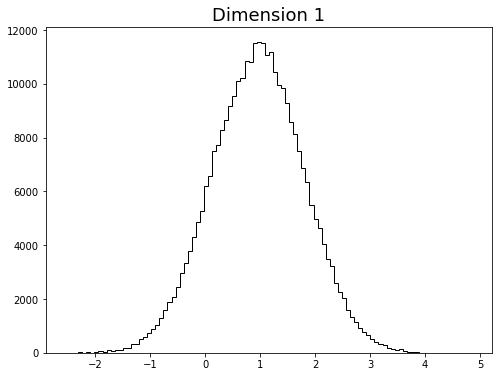

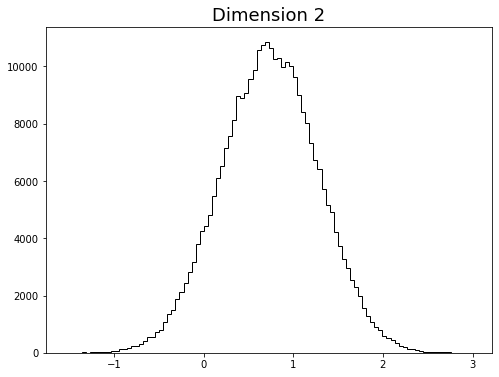

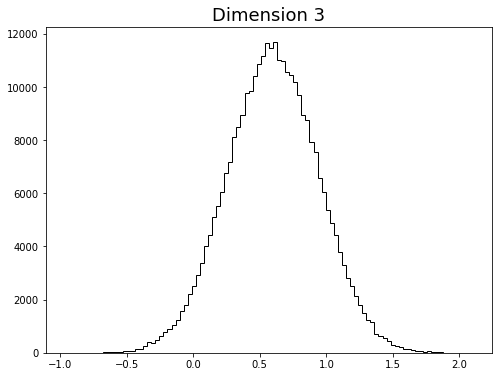

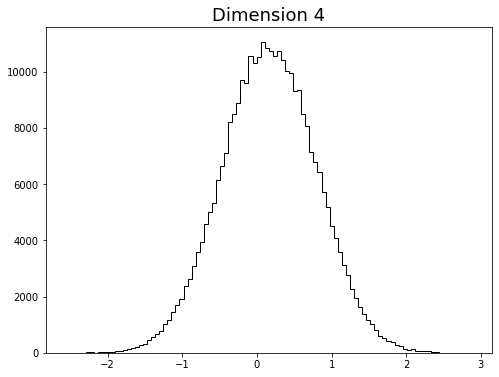

In [8]:
for i in range(ndim):
    plt.figure(figsize=(8,6))
    plt.hist(sampler.flatchain[:,i], 100, color="k", histtype="step")
    plt.title("Dimension {0:d}".format(i), fontsize=18)
plt.show()

In [9]:
print("Mean acceptance fraction: {0:3f}"
      .format(np.mean(sampler.acceptance_fraction)))

print(" This number should be between ~ 0.25 and 0.5 if all went well!")

Mean acceptance fraction: 0.551362
 This number should be between ~ 0.25 and 0.5 if all went well!
